Class=2067, n=1 (0.048%)
Class=2066, n=1 (0.048%)
Class=2065, n=1 (0.048%)
Class=2064, n=1 (0.048%)
Class=2063, n=1 (0.048%)
Class=2062, n=1 (0.048%)
Class=2061, n=1 (0.048%)
Class=2060, n=1 (0.048%)
Class=2059, n=1 (0.048%)
Class=2058, n=1 (0.048%)
Class=2057, n=1 (0.048%)
Class=2056, n=1 (0.048%)
Class=2055, n=1 (0.048%)
Class=2054, n=1 (0.048%)
Class=2053, n=1 (0.048%)
Class=2052, n=1 (0.048%)
Class=2051, n=1 (0.048%)
Class=2050, n=1 (0.048%)
Class=2049, n=1 (0.048%)
Class=2048, n=1 (0.048%)
Class=2047, n=1 (0.048%)
Class=2046, n=1 (0.048%)
Class=2045, n=1 (0.048%)
Class=2044, n=1 (0.048%)
Class=2043, n=1 (0.048%)
Class=2042, n=1 (0.048%)
Class=2041, n=1 (0.048%)
Class=2040, n=1 (0.048%)
Class=2039, n=1 (0.048%)
Class=2038, n=1 (0.048%)
Class=2037, n=1 (0.048%)
Class=2036, n=1 (0.048%)
Class=2035, n=1 (0.048%)
Class=2034, n=1 (0.048%)
Class=2033, n=1 (0.048%)
Class=2032, n=1 (0.048%)
Class=2031, n=1 (0.048%)
Class=2030, n=1 (0.048%)
Class=2029, n=1 (0.048%)
Class=2028, n=1 (0.048%)


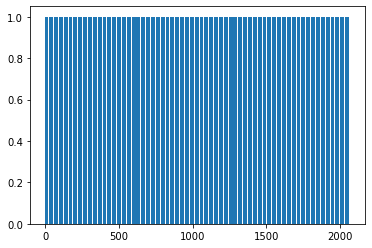

array([2067, 2066, 2065, ...,    2,    1,    0], dtype=int64)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import imblearn
df=pd.read_csv("Clear_Path_300ms_delay01_subt2.csv",sep="	")
c = 3e+8;
#computing the frequencies
freq_array = np.array((c*1e+9)/df["Wavelength(nm)"])
df["Frequency (s^(-1))"] = freq_array
#labelling the frequency values by creating classes 
X, y = np.array(df["Intensity"]), freq_array
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()
#each class is equally represented
#the oversampling won't work
y

In [14]:
interp = interpolate.interp1d(df["Frequency (s^(-1))"],df["Intensity"],kind="cubic")

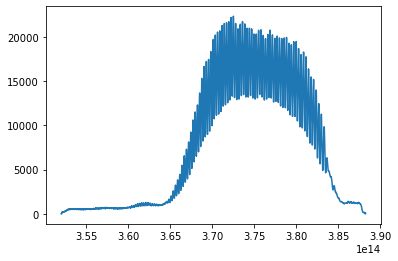

In [31]:
insert_rows = 3   # how many rows to insert
df.index = range(0, insert_rows * len(df), insert_rows)
# create new_df with added rows
new_df = df.reindex(index = range(insert_rows * len(df))) 
x = new_df["Frequency (s^(-1))"].interpolate()
X = np.array(x)
equidistant_freq_array=np.linspace(X[0], X[6203], 6204)
new_intensity = interp(equidistant_freq_array)
df_corrected = pd.DataFrame(list(zip(equidistant_freq_array, new_intensity)),columns=["Frequency (s^(-1))", "Intensity"])
df_corrected
plt.plot(equidistant_freq_array,new_intensity) #it is the same

In [36]:
from scipy.fft import fft, ifft
y=ifft(np.array(df_corrected["Intensity"]))
#calculating the phase shift caused by dispersion
dispersion_phase=np.angle(y,deg=False)
df_corrected["dispersion_phase"]=dispersion_phase
df_corrected

,Frequency (s^(-1)),Intensity,dispersion_phase
0,3.882626e+14,58.620000,-0.000000
1,3.882567e+14,23.486087,2.267483
2,3.882509e+14,1.701103,-1.745053
3,3.882450e+14,-9.388643,-2.889831
4,3.882392e+14,-12.436839,-0.616954
...,...,...,...
6199,3.520716e+14,-1.625363,1.069475
6200,3.520657e+14,2.465708,0.616954
6201,3.520599e+14,-0.302866,2.889831
6202,3.520541e+14,-3.771427,1.745053


In [43]:
freqs = np.fft.fftfreq(len(y))
w = np.fft.fft(y)
# extract frequencies associated with FFT values
for coef, freq in zip(w, freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,
                                                    f=freq))

(58.61999999999068+1.2168044349891716e-13j) * exp(2 pi i t * 0.0)
(23.48608668232862+6.092903959142859e-13j) * exp(2 pi i t * 0.00016118633139909736)
(1.7011025997670686+1.4210854715202004e-13j) * exp(2 pi i t * 0.0003223726627981947)
(-9.38864258100591+3.552713678800501e-13j) * exp(2 pi i t * 0.00048355899419729207)
(-12.436839193323749-1.7695289677988058e-12j) * exp(2 pi i t * 0.0006447453255963894)
(-10.097177570485712-6.780687122898144e-13j) * exp(2 pi i t * 0.0008059316569954868)
(-5.023348045836769+1.1570570890295784e-12j) * exp(2 pi i t * 0.0009671179883945841)
(0.130959047269954+1.5998313784848506e-13j) * exp(2 pi i t * 0.0011283043197936814)
(2.712053375649873+1.179001341000685e-12j) * exp(2 pi i t * 0.0012894906511927789)
(0.41623402584963287+1.6153745008296028e-13j) * exp(2 pi i t * 0.0014506769825918763)
(-4.771506123768873-1.530470195021394e-12j) * exp(2 pi i t * 0.0016118633139909737)
(-7.99106219249704+1.2224665724147599e-12j) * exp(2 pi i t * 0.0017730496453900709)
(-4.

(18955.930688025714-5.5121343368205145e-14j) * exp(2 pi i t * 0.34542230818826564)
(18578.536724052356-9.402164966842199e-13j) * exp(2 pi i t * 0.34558349451966475)
(18195.47190794797-1.7819829853254114e-12j) * exp(2 pi i t * 0.34574468085106386)
(17783.967812007104-1.063203994025899e-12j) * exp(2 pi i t * 0.3459058671824629)
(17333.93000921781-4.867566618008576e-13j) * exp(2 pi i t * 0.346067053513862)
(16857.132252217158-1.5774509420043246e-13j) * exp(2 pi i t * 0.34622823984526113)
(16367.515668258682-8.978693632454858e-13j) * exp(2 pi i t * 0.34638942617666024)
(15879.483026247732+2.8393317995572427e-13j) * exp(2 pi i t * 0.3465506125080593)
(15410.562234571342-3.976151083478218e-13j) * exp(2 pi i t * 0.3467117988394584)
(14979.577090089195+9.137639856275056e-13j) * exp(2 pi i t * 0.3468729851708575)
(14605.133456933694+4.089595686612707e-13j) * exp(2 pi i t * 0.3470341715022566)
(14294.90359133868+6.954196269464481e-13j) * exp(2 pi i t * 0.3471953578336557)
(14040.861677678018-1.1

(944.8023628621777-4.3258588590918903e-13j) * exp(2 pi i t * -0.28110896196002577)
(976.448553908338+1.0279689018940355e-12j) * exp(2 pi i t * -0.2809477756286267)
(1015.7297676941962+4.598663684650891e-13j) * exp(2 pi i t * -0.2807865892972276)
(1038.7688625866867+8.817853446200211e-13j) * exp(2 pi i t * -0.2806254029658285)
(1043.7645866382409-3.393419874726533e-13j) * exp(2 pi i t * -0.2804642166344294)
(1048.1032996946087+2.0127922641523366e-13j) * exp(2 pi i t * -0.28030303030303033)
(1066.7409771886805+2.7498969794295136e-13j) * exp(2 pi i t * -0.2801418439716312)
(1095.69470297942+1.473138620313014e-13j) * exp(2 pi i t * -0.2799806576402321)
(1123.7982776744157-2.7925616628973385e-13j) * exp(2 pi i t * -0.279819471308833)
(1144.5454694238751+3.9513677721995236e-13j) * exp(2 pi i t * -0.2796582849774339)
(1160.8703225057598-1.441221372090185e-14j) * exp(2 pi i t * -0.27949709864603484)
(1176.6255403220803-4.3752397075595156e-13j) * exp(2 pi i t * -0.2793359123146357)
(1191.468510

In [47]:
df_corrected["pseudo_Frequency (s^(-1))"] = freqs
df_corrected

,Frequency (s^(-1)),Intensity,dispersion_phase,pseudo_Frequency (s^(-1))
0,3.882626e+14,58.620000,-0.000000,0.000000
1,3.882567e+14,23.486087,2.267483,0.000161
2,3.882509e+14,1.701103,-1.745053,0.000322
3,3.882450e+14,-9.388643,-2.889831,0.000484
4,3.882392e+14,-12.436839,-0.616954,0.000645
...,...,...,...,...
6199,3.520716e+14,-1.625363,1.069475,-0.000806
6200,3.520657e+14,2.465708,0.616954,-0.000645
6201,3.520599e+14,-0.302866,2.889831,-0.000484
6202,3.520541e+14,-3.771427,1.745053,-0.000322
